<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

</center>

# <FONT COLOR="Blue">MACHINE LEARNING Project</font>

# Description of the dataset

The **rain.txt** file contains 688 meteorological observations at a given station, provided by Météo France. 
The aim of this project is to predict the amount of rainfall over the newt day.

The explanatory variables are:

Observed meteorological parameters during the **current day** :

* **date** : the date of the current day ;
* **ff** : the wind speed (in $m.s^{-1}$) ;
* **t** : the temperature (in Kelvin $K$) ;
* **td** : the dew point (in $K$) ;
* **hu** : the humidity (in %) ;
* **dd** : the wind direction (in degrees) ;
* **precip** : the total amount of precipitation (in $kg.m^{-2}$) ;

Forecasts of meteorological parameters for the **next day** by the Météo France AROME model:

* **ws_arome** : the wind speed (in $m.s^{-1}$)  ;
* **p3031_arome** : the wind direction (in degrees) ;
* **u10_arome** and **vu10_arome** : the $U$ (from West to East) and $V$ (from South to North) wind components (in $m.s^{-1}$) at the vertical level of 10$m$ ;
* **t2m_arome** : the temperature at the vertical level of 2$m$ (in $K$) ;
* **d2m_arome** : the dew point at the vertical level of 2$m$ (in $K$) ;
* **r_arome** : the humidity (in %) ;
* **tp_arome** : the total amount of precipitation (in $kg.m^{-2}$) ;
* **mls_arome** : the sea level pressure (in $Pa$) 

The response variables are:

* **rain** (quantitative) : the total amount of rainfall over the next day (in $kg.m^{-2}$) ;
* **rain_class** (qualitative) : an artificially created categorial variable with three classes that are **no_rain** (if $\text{rain} = 0$), **low_rain** (if $0 < \text{rain} <= 2$), and **high_rain** (if $\text{rain} > 2$)

We consider here the classification problem : to predict the rain quantity (**rain_class**) during the next day from the explanatory variables.

# Prise en compte des données

In [1]:
import pandas as pd
import numpy as np
import panel as pn
# Lecture des données
path=""
meteo=pd.read_csv(path+"rain_project.txt",delimiter=" ",header=0)
del(meteo["Id"]) #supprimer la colonne Id
# Vérification du contenu
meteo.head()

,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
1,2017-06-11,3.945000,289.408750,285.277083,78.783333,246.750000,0.0,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,2.328277,101672.850,0.2,low_rain
2,2016-03-06,3.739583,276.375833,273.422500,81.700000,260.333333,1.2,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,10.675441,100583.760,4.2,high_rain
3,2016-07-29,3.273750,288.869167,286.723333,87.620833,259.041667,0.2,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,4.582309,101482.984,0.0,no_rain
4,2016-05-16,1.745000,284.288750,280.215833,76.587500,216.541667,0.0,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,0.940254,102223.586,0.0,no_rain
5,2016-02-03,5.718750,277.527917,274.529167,81.391667,285.541667,1.6,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,13.903076,102416.220,0.0,no_rain


In [2]:
meteo.date=pd.to_datetime(meteo.date)
print("date de début", meteo["date"].min(), "date de fin", meteo["date"].max())
meteo["date"] = meteo["date"].dt.month_name() #transforme la valeur date en une variable mois
meteo.date

date de début 2016-01-02 00:00:00 date de fin 2017-12-30 00:00:00


1          June
2         March
3          July
4           May
5      February
         ...   
726       April
727      August
728         May
729        June
730       April
Name: date, Length: 688, dtype: object

In [3]:
#On affecte le bon type aux variables "date" et rain_class"
meteo["date"]=pd.Categorical(meteo["date"],ordered=False)
meteo["rain_class"]=pd.Categorical(meteo["rain_class"],ordered=False)
meteo.dtypes

date           category
ff              float64
t               float64
td              float64
hu              float64
dd              float64
precip          float64
ws_arome        float64
p3031_arome     float64
u10_arome       float64
v10_arome       float64
t2m_arome       float64
d2m_arome       float64
r_arome         float64
tp_arome        float64
msl_arome       float64
rain            float64
rain_class     category
dtype: object

# Analyse de données

## Statistique descriptive unidimensionnelle

In [4]:
meteo.describe() #Indicateurs statistiques 1D pour les variables quantitatives

,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,4.082196,283.650528,281.080129,85.560841,206.575367,2.383721,3.719291,203.323936,1.158044,0.385976,283.610960,280.941118,84.828390,29.736470,101515.162295,2.371657
std,1.591358,4.943628,4.609328,8.490620,77.250928,4.624367,1.516759,77.343712,2.344850,2.571087,5.024887,4.593312,8.284147,74.607790,1028.615270,4.586252
min,1.158333,269.478333,267.113750,46.750000,32.916667,0.000000,0.967453,27.199490,-5.251934,-7.267575,270.160596,266.996709,56.334398,0.000000,96622.930000,0.000000
25%,2.869583,279.850208,277.645417,80.534375,158.739583,0.000000,2.622007,157.068571,-0.479448,-1.649479,279.766698,277.553007,79.346976,0.098462,101059.077500,0.000000
50%,3.858542,283.185000,281.176458,86.395833,222.812500,0.400000,3.443239,218.569970,1.378780,0.238069,283.137799,281.104531,85.441507,3.115312,101644.305000,0.400000
75%,4.970417,287.588333,284.725104,92.055208,260.677083,2.600000,4.582671,258.650633,2.683759,2.270376,287.457586,284.534604,90.634456,24.014791,102199.950000,2.600000
max,12.500000,299.517917,291.064583,100.000000,343.041667,34.500000,10.175489,335.756474,9.478086,8.543240,299.029673,290.431856,99.911473,1069.048185,104078.590000,34.500000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

cm = 1/2.54

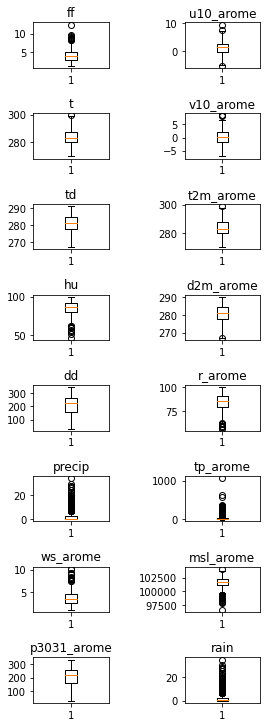

In [6]:
# Tracé des boxplots des variables quantitatives
fig, ax = plt.subplots(8,2,figsize=(10*cm, 30*cm))
ax[0,0].boxplot(meteo["ff"])
ax[0,0].set_title('ff')
ax[1,0].boxplot(meteo["t"])
ax[1,0].set_title('t')
ax[2,0].boxplot(meteo["td"])
ax[2,0].set_title('td')
ax[3,0].boxplot(meteo["hu"])
ax[3,0].set_title('hu')
ax[4,0].boxplot(meteo["dd"])
ax[4,0].set_title('dd')
ax[5,0].boxplot(meteo["precip"])
ax[5,0].set_title('precip')
ax[6,0].boxplot(meteo["ws_arome"])
ax[6,0].set_title('ws_arome')
ax[7,0].boxplot(meteo["p3031_arome"])
ax[7,0].set_title('p3031_arome')
ax[0,1].boxplot(meteo["u10_arome"])
ax[0,1].set_title('u10_arome')
ax[1,1].boxplot(meteo["v10_arome"])
ax[1,1].set_title('v10_arome')
ax[2,1].boxplot(meteo["t2m_arome"])
ax[2,1].set_title('t2m_arome')
ax[3,1].boxplot(meteo["d2m_arome"])
ax[3,1].set_title('d2m_arome')
ax[4,1].boxplot(meteo["r_arome"])
ax[4,1].set_title('r_arome')
ax[5,1].boxplot(meteo["tp_arome"])
ax[5,1].set_title('tp_arome')
ax[6,1].boxplot(meteo["msl_arome"])
ax[6,1].set_title('msl_arome')
ax[7,1].boxplot(meteo["rain"])
ax[7,1].set_title('rain')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.show()

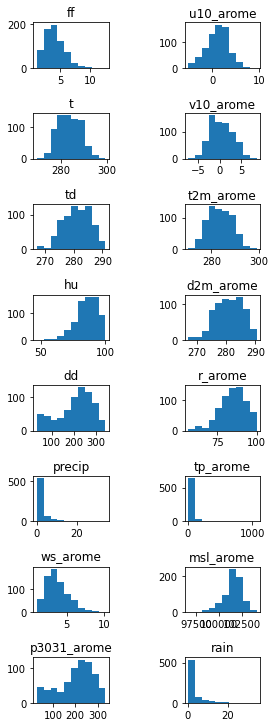

In [7]:
# Tracé des histogrammes des variables quantitatives
fig, ax = plt.subplots(8,2,figsize=(10*cm, 30*cm))
ax[0,0].hist(meteo["ff"])
ax[0,0].set_title('ff')
ax[1,0].hist(meteo["t"])
ax[1,0].set_title('t')
ax[2,0].hist(meteo["td"])
ax[2,0].set_title('td')
ax[3,0].hist(meteo["hu"])
ax[3,0].set_title('hu')
ax[4,0].hist(meteo["dd"])
ax[4,0].set_title('dd')
ax[5,0].hist(meteo["precip"])
ax[5,0].set_title('precip')
ax[6,0].hist(meteo["ws_arome"])
ax[6,0].set_title('ws_arome')
ax[7,0].hist(meteo["p3031_arome"])
ax[7,0].set_title('p3031_arome')
ax[0,1].hist(meteo["u10_arome"])
ax[0,1].set_title('u10_arome')
ax[1,1].hist(meteo["v10_arome"])
ax[1,1].set_title('v10_arome')
ax[2,1].hist(meteo["t2m_arome"])
ax[2,1].set_title('t2m_arome')
ax[3,1].hist(meteo["d2m_arome"])
ax[3,1].set_title('d2m_arome')
ax[4,1].hist(meteo["r_arome"])
ax[4,1].set_title('r_arome')
ax[5,1].hist(meteo["tp_arome"])
ax[5,1].set_title('tp_arome')
ax[6,1].hist(meteo["msl_arome"])
ax[6,1].set_title('msl_arome')
ax[7,1].hist(meteo["rain"])
ax[7,1].set_title('rain')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.show()

L'observation des boxplots et des histogrammes suggère des transformations pour une meilleure utilisation des modèles linéaires pour les variables :

6 precip -> LOG (1 + ...)

14 tp_arome -> LOG (1 + ...)

16 rain -> LOG (1 + ...)    

In [8]:
from math import sqrt, log
meteo["Lprecip"]=meteo["precip"].map(lambda x: log(1+x))
meteo["Ltp_arome"]=meteo["tp_arome"].map(lambda x: log(1+x))
meteo["Lrain"]=meteo["rain"].map(lambda x: log(1+x))

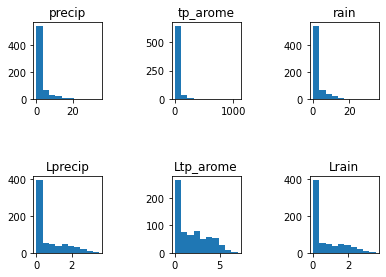

In [9]:
#fig, ax = plt.subplots(2,3,figsize=(10*cm, 30*cm))
fig, ax = plt.subplots(2,3)
ax[0,0].hist(meteo["precip"])
ax[0,0].set_title('precip')
ax[1,0].hist(meteo["Lprecip"])
ax[1,0].set_title('Lprecip')
ax[0,1].hist(meteo["tp_arome"])
ax[0,1].set_title('tp_arome')
ax[1,1].hist(meteo["Ltp_arome"])
ax[1,1].set_title('Ltp_arome')
ax[0,2].hist(meteo["rain"])
ax[0,2].set_title('rain')
ax[1,2].hist(meteo["Lrain"])
ax[1,2].set_title('Lrain')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.show()

In [10]:
del meteo["precip"]
del meteo["tp_arome"]
del meteo["rain"]

In [11]:
meteo.head()

,date,ff,t,td,hu,dd,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,msl_arome,rain_class,Lprecip,Ltp_arome,Lrain
1,June,3.945000,289.408750,285.277083,78.783333,246.750000,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,101672.850,low_rain,0.000000,1.202455,0.182322
2,March,3.739583,276.375833,273.422500,81.700000,260.333333,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,100583.760,high_rain,0.788457,2.457488,1.648659
3,July,3.273750,288.869167,286.723333,87.620833,259.041667,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,101482.984,no_rain,0.182322,1.719603,0.000000
4,May,1.745000,284.288750,280.215833,76.587500,216.541667,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,102223.586,no_rain,0.000000,0.662819,0.000000
5,February,5.718750,277.527917,274.529167,81.391667,285.541667,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,102416.220,no_rain,0.955511,2.701568,0.000000


In [12]:
# variables qualitatives
meteo["date"].value_counts()

July         62
March        62
January      61
June         59
November     59
May          58
February     57
September    56
August       55
December     55
April        53
October      51
Name: date, dtype: int64

In [13]:
meteo["rain_class"].value_counts()

low_rain     292
no_rain      208
high_rain    188
Name: rain_class, dtype: int64

## Statistique descriptive multidimensionnelle

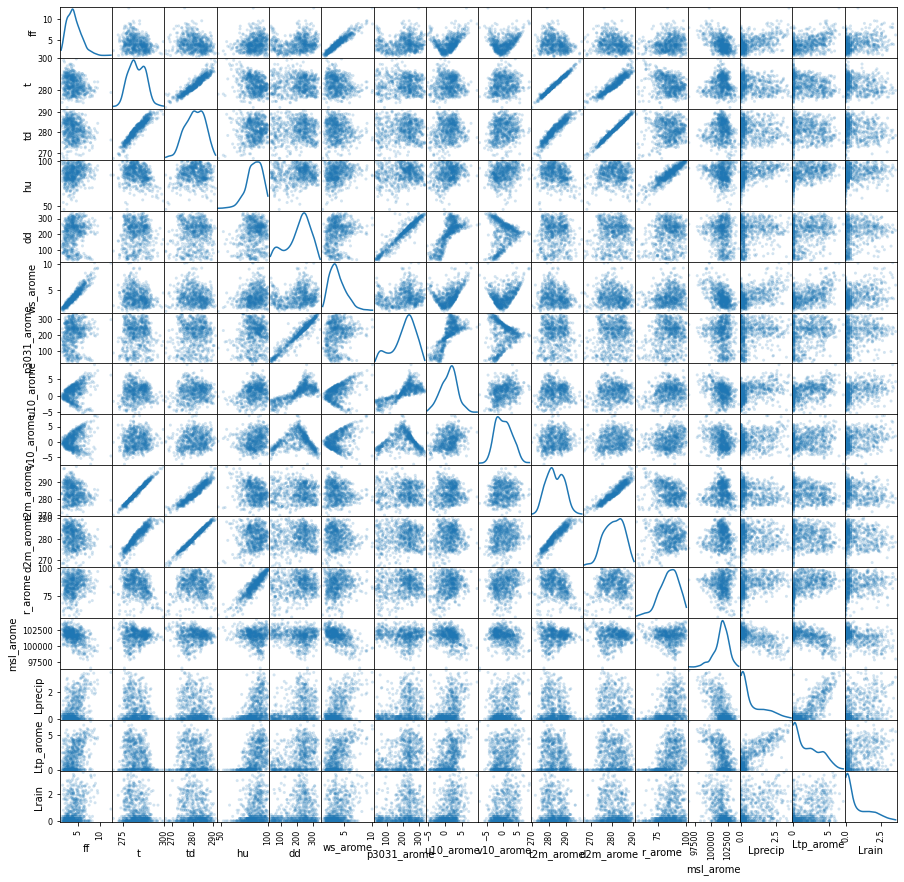

In [14]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome","Lrain"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

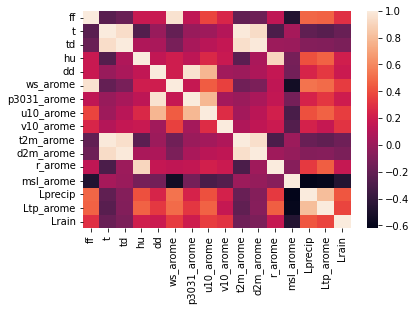

In [15]:
correlation_mat = meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome","Lrain"]].corr()

import seaborn as sns
sns.heatmap(correlation_mat, annot = False)

plt.show()

## Analyse en composantes principales 

On considère les variables quantitatives, sauf la sortie rain, et on effectue une analyse en composantes principales.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# réduction des variables 
X=scale(meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome"]])


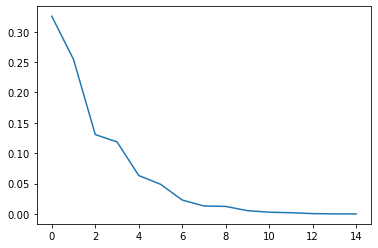

In [17]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

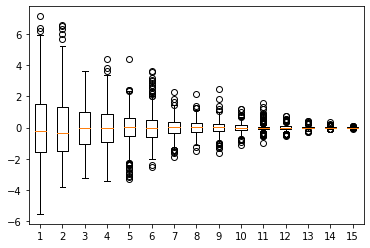

In [18]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

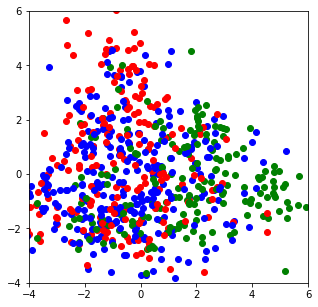

In [19]:
## Représentation des individus sur les vecteurs principaux 1 et 2
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,0], C[:,1], meteo["rain_class"]):  #3 modalités ICI
    color = "red" if nom=="no_rain" else "blue" if nom=="low_rain" else "green"
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

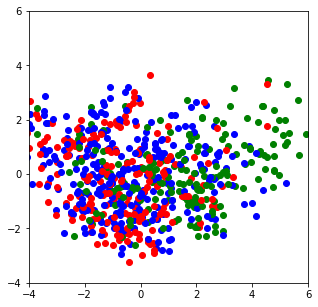

In [20]:
## Représentation des individus sur les vecteurs principaux 1 et 3
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,0], C[:,2], meteo["rain_class"]):  #3 modalités ICI
    color = "red" if nom=="no_rain" else "blue" if nom=="low_rain" else "green"
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

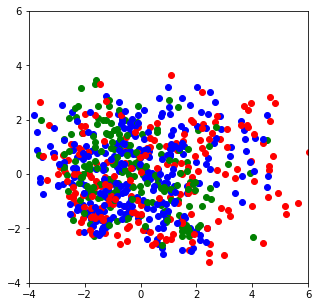

In [21]:
## Représentation des individus sur les vecteurs principaux 2 et 3
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,1], C[:,2], meteo["rain_class"]):  #3 modalités ICI
    color = "red" if nom=="no_rain" else "blue" if nom=="low_rain" else "green"
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

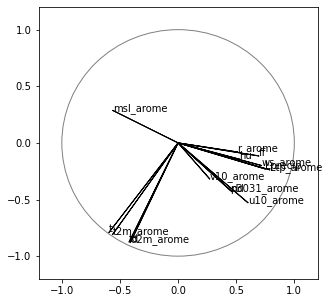

In [22]:
## Coordonnées et représentation des variables sur les axes factoriels 1 et 2
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

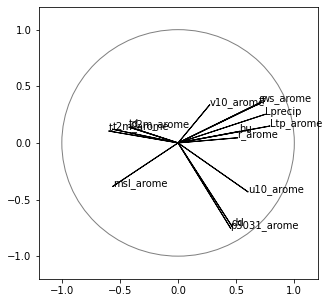

In [23]:
## Coordonnées et représentation des variables sur les axes factoriels 1 et 3
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

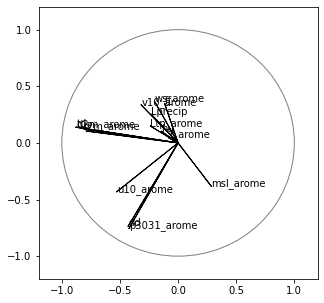

In [24]:
## Coordonnées et représentation des variables sur les axes factoriels 2 et 3
coord1=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# Modélisations

## Extraction des échantillons apprentissage et test

In [25]:
meteo.head()

,date,ff,t,td,hu,dd,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,msl_arome,rain_class,Lprecip,Ltp_arome,Lrain
1,June,3.945000,289.408750,285.277083,78.783333,246.750000,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,101672.850,low_rain,0.000000,1.202455,0.182322
2,March,3.739583,276.375833,273.422500,81.700000,260.333333,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,100583.760,high_rain,0.788457,2.457488,1.648659
3,July,3.273750,288.869167,286.723333,87.620833,259.041667,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,101482.984,no_rain,0.182322,1.719603,0.000000
4,May,1.745000,284.288750,280.215833,76.587500,216.541667,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,102223.586,no_rain,0.000000,0.662819,0.000000
5,February,5.718750,277.527917,274.529167,81.391667,285.541667,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,102416.220,no_rain,0.955511,2.701568,0.000000


In [26]:
# Variables explicatives
meteoDum=pd.get_dummies(meteo["date"])
meteoQuant=meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome"]]
dfC=pd.concat([meteoDum,meteoQuant],axis=1)
dfC.head()

,April,August,December,February,January,July,June,March,May,November,...,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,msl_arome,Lprecip,Ltp_arome
1,0,0,0,0,0,0,1,0,0,0,...,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,101672.850,0.000000,1.202455
2,0,0,0,0,0,0,0,1,0,0,...,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,100583.760,0.788457,2.457488
3,0,0,0,0,0,1,0,0,0,0,...,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,101482.984,0.182322,1.719603
4,0,0,0,0,0,0,0,0,1,0,...,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,102223.586,0.000000,0.662819
5,0,0,0,1,0,0,0,0,0,0,...,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,102416.220,0.955511,2.701568


In [27]:
# Variables explicatives
meteoDum=pd.get_dummies(meteo["date"])
del meteoDum["April"] #On supprime la 1re colonne pour éviter la dépendance linéaire
meteoQuant=meteo[["ff","t","td","hu","dd","ws_arome","p3031_arome","u10_arome","v10_arome","t2m_arome","d2m_arome","r_arome","msl_arome","Lprecip","Ltp_arome"]]
dfC=pd.concat([meteoDum,meteoQuant],axis=1)
dfC.head()

,August,December,February,January,July,June,March,May,November,October,...,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,msl_arome,Lprecip,Ltp_arome
1,0,0,0,0,0,1,0,0,0,0,...,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,101672.850,0.000000,1.202455
2,0,0,0,0,0,0,1,0,0,0,...,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,100583.760,0.788457,2.457488
3,0,0,0,0,1,0,0,0,0,0,...,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,101482.984,0.182322,1.719603
4,0,0,0,0,0,0,0,1,0,0,...,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,102223.586,0.000000,0.662819
5,0,0,1,0,0,0,0,0,0,0,...,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,102416.220,0.955511,2.701568


In [28]:
# variable à expliquer 3 CLASSES
Yb=meteo["rain_class"]
np.size(Yb)

688

In [29]:
# variable à expliquer réelle
Yr=meteo["Lrain"]
np.size(Yr)

688

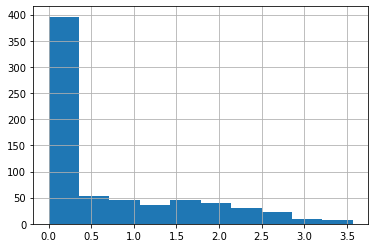

In [30]:
Yr.hist()
plt.show()

Extractions des échantillons d'apprentissage et test pour les deux types de modèles.

In [31]:
from sklearn.model_selection import train_test_split  
#test_size = échantillon test de taille 150 parmi les 688 observations (22 %)
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=150,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=150,random_state=11)

Standardisation des données ou normalisation.

In [32]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

## Modèles linéaires

### Régression linéaire ou modèle gaussien

#### Régression sans pénalisation Lasso 

In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(Xr_train,Yr_train)
prev=reg.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

MSE= 0.6772743123030083


In [34]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,prev))

R2= 0.256427593900037


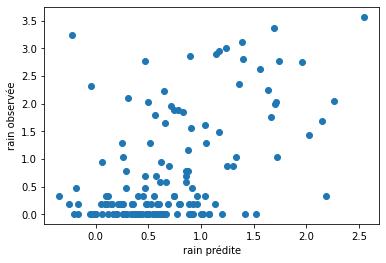

In [35]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
plt.show()

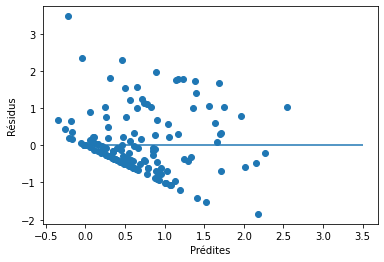

In [36]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,3.5)
plt.show()

#### Régression avec choix de modèle par régularisation avec une pénalisation Lasso 

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

MSE= 0.9108526694881668


In [38]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,prev))

R2= -1.5649125752581483e-05


Le paramètre de pénalisation lasso est optimisé par validation croisée (K-FOLD avec 10 folds).

In [39]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.283718, Meilleur paramètre = {'alpha': 0.05}


Prévision avec la valeur optimale de `alpha` puis calcul et tracé des résidus.

In [40]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))
print("R2=",r2_score(Yr_test,prev))

MSE= 0.6336774853718373
R2= 0.3042920956398154


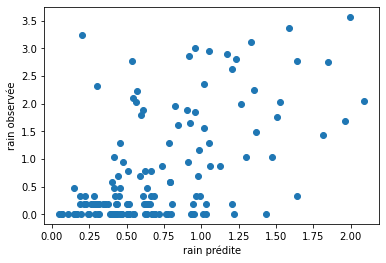

In [41]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
plt.show()

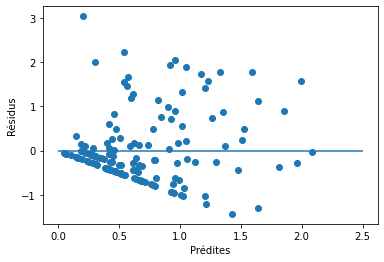

In [42]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,2.5)
plt.show()

L'interprétation nécessite de connaître les valeurs des coefficients du modèle alors que l'objet `regLassOpt` issu de `GridSearchCV` ne retient pas les paramètres estimés. Il faut donc le ré-estimer avec la valeur optimale du paramètre de pénalisation si l'on souhaite afficher ces coefficients.

In [43]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_

array([-0.        ,  0.00414549,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.06559994, -0.00255368,  0.        ,
        0.        ,  0.        ,  0.        ,  0.1383698 ,  0.09165094,
       -0.        , -0.01107101,  0.        , -0.1825076 ,  0.11795001,
        0.        ])

In [44]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 8 variables et en supprime 18


Text(0.5, 1.0, 'Coefficients du modèle lasso')

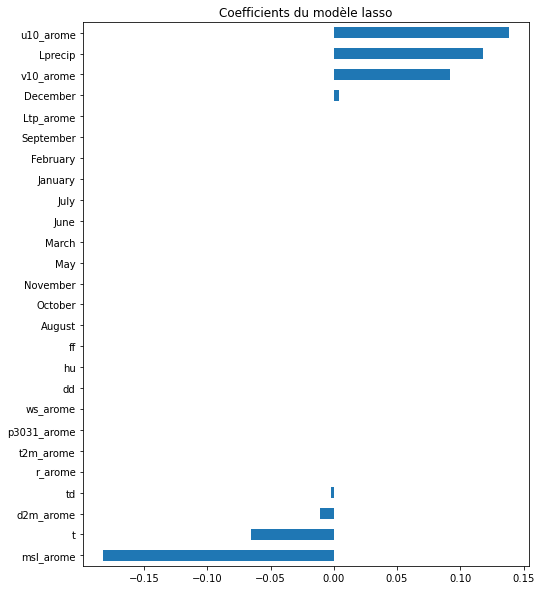

In [45]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Le graphe suivant permet d'identifier les bonnes et mauvaises prévisions de pluie (3 catégories).

ATTENTION : on applique le changement de variable LOG ( 1 + ... )

**no_rain** (if $\text{rain} <= 0$) -> (if $\text{Lrain} <= 0$)

**low_rain** (if $0 < \text{rain} <= 2$) -> (if $\text{Lrain} <= log(3)$)

**high_rain** (if $\text{rain} > 2$) -> (if $\text{Lrain} > log(3)$)

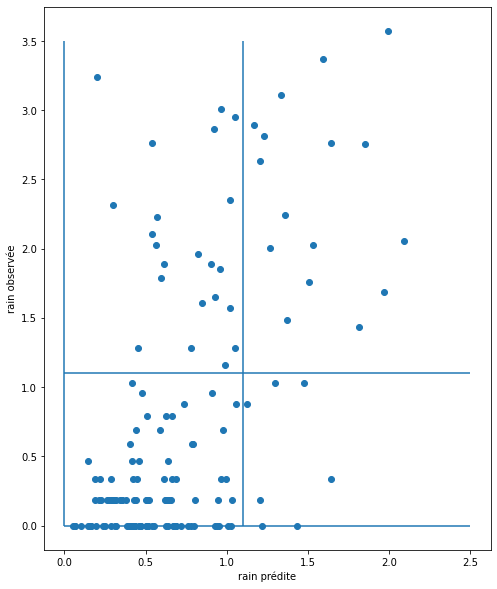

In [46]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
#plt.hlines(0,0,3.5)
#plt.hlines(2,0,3.5)
#plt.vlines(0,0,3.5)
#plt.vlines(2,0,3.5)
plt.hlines(0,0,2.5)
plt.hlines(log(3),0,2.5)
plt.vlines(0,0,3.5)
plt.vlines(log(3),0,3.5)
plt.show()

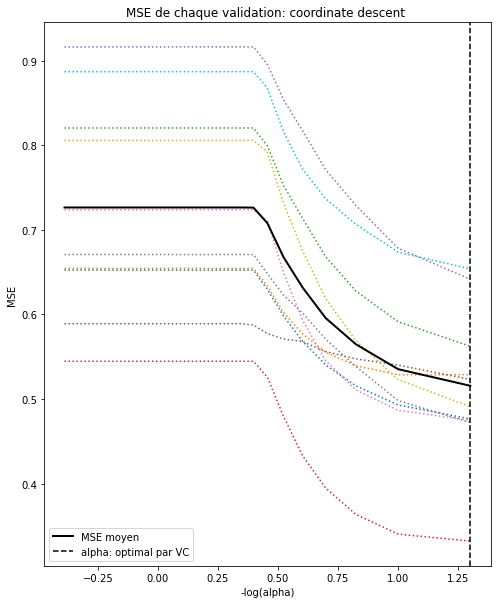

In [47]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=10, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(Xr_train,Yr_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

Tracés des chemins de régularisation.

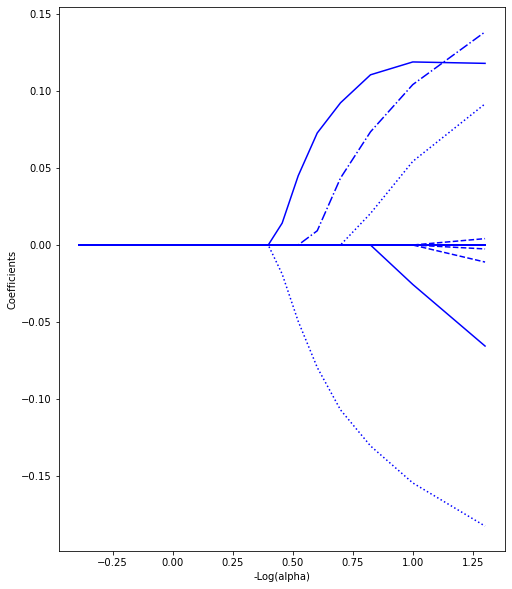

In [48]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xr_train,Yr_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

### Régression logistique ou modèle binomial

La même démarche est déroulée mais en modélisant directement la variable qualitative Yb de type de pluie.

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
RAIN_DIC = {1 : "high_rain",
2 : "low_rain",
3 : "no_rain"}
labels = RAIN_DIC.values()

#### Régression sans pénalisation Lasso 

In [51]:
import time
ts = time.time()
method = LogisticRegression(solver='liblinear',multi_class='auto')
method.fit(Xr_train,Yb_train)
score = method.score(Xr_test, Yb_test)
ypred = method.predict(Xr_test)
te = time.time()

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ypred,Yb_test), index = labels, columns=labels)

Score : 0.546667, time running : 0 secondes


,high_rain,low_rain,no_rain
high_rain,20,10,5
low_rain,15,42,27
no_rain,3,8,20


#### Régression avec pénalisation Lasso 

In [53]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=10,n_jobs=-1)
logitOpt=logit.fit(Xr_train, Yb_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.458875, Meilleur paramètre = {'C': 1.2}


In [54]:
# erreur sur l'échantillon test
1-logitOpt.score(Xr_test, Yb_test)

0.44666666666666666

Le modèle "optimal"  obtenu est utilisé pour prédire l'échantillon test et estimer ainsi, sans biais, une erreur de prévision. 

La matrice de confusion croise les classes de pluie prédites avec celles effectivement observées. 

In [55]:
# Prévision
y_chap = logitOpt.predict(Xr_test)
# matrice de confusion
#table=pd.crosstab(y_chap,Yb_test)
#print(table)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,20,10,5
low_rain,15,43,27
no_rain,3,7,20


In [56]:
# Coefficients
logitLasso=LogisticRegression(penalty="l1",C=logitOpt.best_params_['C'],
                              solver="liblinear")
logitCoef=logitLasso.fit(Xr_train,Yb_train).coef_
print(logitCoef[0])

[ 0.          0.48686561  0.29409885  0.4661138  -0.05056804  0.00884061
  0.24477169  0.          0.39010679  0.19554398  0.03626489  0.
  0.          0.         -0.13957348  0.         -0.47690723  0.5644621
  0.41214567  0.45343517  0.          0.         -0.03674968 -1.01027847
  0.37173177 -0.21103855]


In [57]:
coef = pd.Series(logitCoef[0], index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 18 variables et en supprime 8


Text(0.5, 1.0, 'Coefficients du modèle lasso')

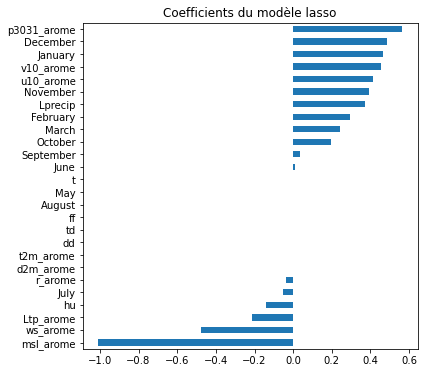

In [58]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Pas de courbe ROC ici car on n'est pas en classification binaire.

## Support Vector Machine

L'optimisation de la pénalisation (paramètre C) et l'écart-type (paramètre *gamma*) du noyau gaussien est recherchée sur une grille par validation croisée.

### Classification

In [59]:
#help(SVC)

In [60]:
# Calcul de l'écart-type du noyau gaussien par défaut pour pouvoir le calibrer

#if ``gamma='scale'`` (default) is passed then it uses
# |        1 / (n_features * X.var()) as value of gamma

#n_features = 26 et Xr_Train.var=0 (variables standardisées)
#vérification :
#print((Xr_train.size/(688-150),Xr_train.var()))
gdefault = 1 / 26
print(gdefault)

0.038461538461538464


In [61]:
from sklearn.svm import SVC
param=[{"C":[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2],"gamma":[.03,.04,.05]}]
svm= GridSearchCV(SVC(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.440321, Meilleur paramètre = {'C': 1, 'gamma': 0.03}


In [62]:
# erreur de prévision sur le test
1-svmOpt.score(Xr_test,Yb_test)

0.45999999999999996

In [63]:
# prévision de l'échantillon test
y_chap = svmOpt.predict(Xr_test)
# matrice de confusion
#table=pd.crosstab(y_chap,Yb_test)
#print(table)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,19,8,3
low_rain,16,45,32
no_rain,3,7,17


### Régression

In [64]:
from sklearn.svm import SVR
param=[{"C":[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2],"gamma":[.03,.04,.05]}]
svm= GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))

Meilleur R2 = 0.255783, Meilleur paramètre = {'C': 0.4, 'gamma': 0.03}


In [65]:
prev=svm.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))
print("R2=",r2_score(Yr_test,prev))

MSE= 0.6474821950377293
R2= 0.28913604882789035


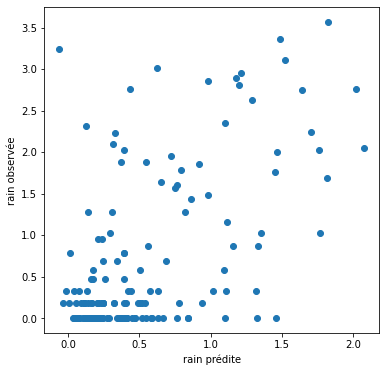

In [66]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
plt.show()

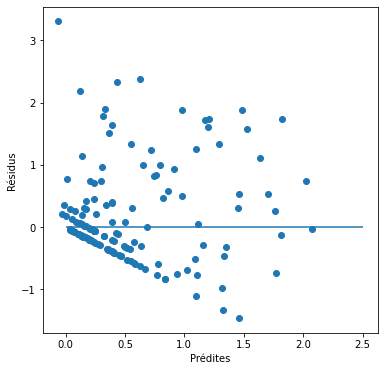

In [67]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,2.5)
plt.show()

## CART

### K plus proches voisins - classification

Le paramètre de complexité `k` est optimisé sur une grille prédéfinie en minimisant l'erreur estimée par validation croisée.

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# Optimisation de k
# grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,n_jobs=-1)
knnOpt=knn.fit(Xr_train, Yb_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))

Meilleur score = 0.449476, Meilleur paramètre = {'n_neighbors': 12}


In [69]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-knnOpt.score(Xr_test,Yb_test)

0.48

In [70]:
# Prévision de l'échantillon test
y_chap = knnOpt.predict(Xr_test)
# matrice de confusion
#table=pd.crosstab(y_chap,Yb_test)
#print(table)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,20,10,8
low_rain,14,43,29
no_rain,4,7,15


### K plus proches voisins - régression

In [71]:
from sklearn.neighbors import KNeighborsRegressor
# Optimisation de k
# grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
knn=GridSearchCV(KNeighborsRegressor(),param_grid,cv=10,n_jobs=-1)
knnOpt=knn.fit(Xr_train, Yr_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (knnOpt.best_score_,knnOpt.best_params_))

Meilleur R2 = 0.234112, Meilleur paramètre = {'n_neighbors': 14}


In [72]:
prev=knnOpt.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))
print("R2=",r2_score(Yr_test,prev))

MSE= 0.7312786354889221
R2= 0.19713681053250787


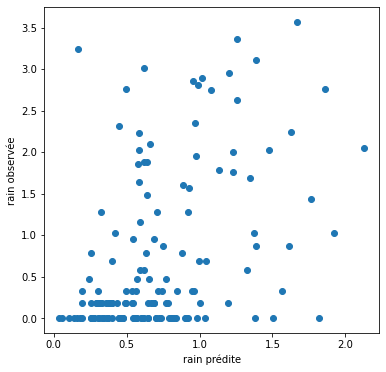

In [73]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
plt.show()

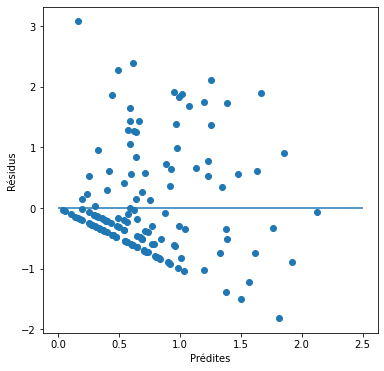

In [74]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,2.5)
plt.show()

### Arbre binaire de décision

Les arbres de décision sont bien implémentés dans *scikit-learn* mais avec une insuffisance pour leur élagage. Ce n'est pas une *pénalisation* de la *complexité*, et donc précisément le nombre de feuilles qui est optimisé, mais la profondeur globale de l'arbre.

Comme précédemment, la validation croisée permet d'optimiser ce paramètre sur une grille.

### Arbre de classification

In [75]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.501712, Meilleur paramètre = {'max_depth': 3}


In [76]:
# Estimation de l'erreur de prévision
1-treeOpt.score(Xr_test,Yb_test)

0.48

In [77]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(Xr_test)
# matrice de confusion
#table=pd.crosstab(y_chap,Yb_test)
#print(table)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,20,17,9
low_rain,13,38,23
no_rain,5,5,20


Il est possible de lister la construction des noeuds de l'arbre.

In [78]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,Yb_train)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")  

True

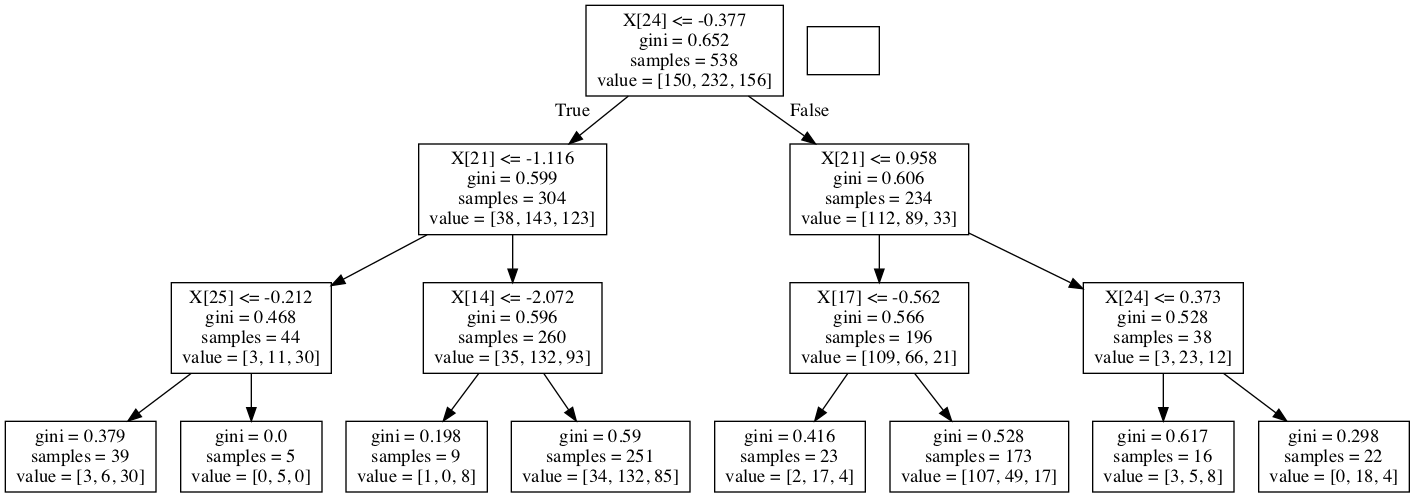

In [79]:
from IPython.display import Image
Image(filename='treeOpt.png')

### Arbre de régression

In [80]:
from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Yr_train)
# paramètre optimal
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (treeOpt.best_score_,treeOpt.best_params_))
#print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur R2 = 0.165400, Meilleur paramètre = {'max_depth': 3}


In [81]:
prev=treeOpt.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))
print("R2=",r2_score(Yr_test,prev))

MSE= 0.7386679687526148
R2= 0.18902413858474887


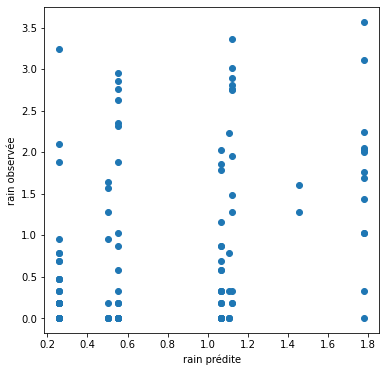

In [82]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
plt.show()

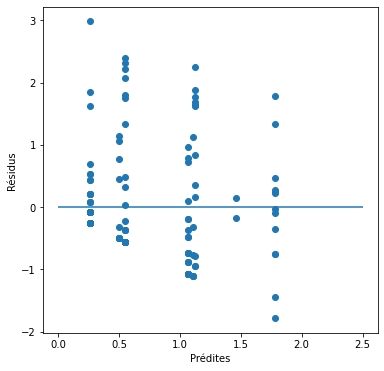

In [83]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,2.5)
plt.show()

In [84]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
import pydotplus
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,Yr_train)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")  

True

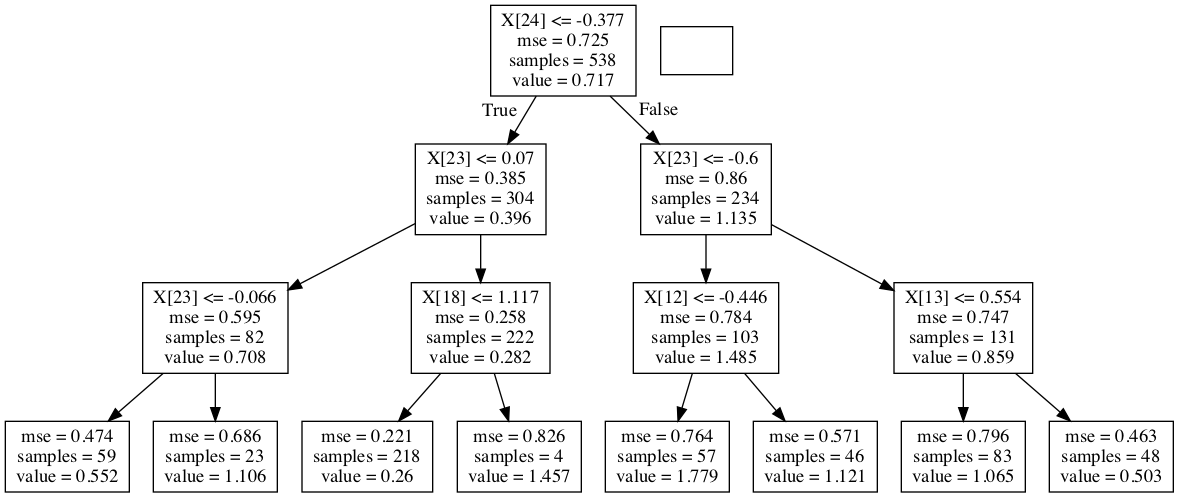

In [85]:
from IPython.display import Image
Image(filename='treeOpt.png')

## Forêts aléatoires

### Classification

In [86]:
#help(RandomForestClassifier)

In [87]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Yb_train)
print(1-rfFit.oob_score_)

0.4795539033457249


In [88]:
# erreur de prévision sur le test
1-rfFit.score(Xr_test,Yb_test)

0.44666666666666666

Optimisation par validation croisée du nombre d'arbres dans la forêts et du nombre de variables tirées aléatoirement lors de la construction de chaque noeud. 

In [89]:
param=[{"n_estimators":list(range(100,500,100)),"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.481307, Meilleur paramètre = {'max_features': 3, 'n_estimators': 100}


In [90]:
# erreur de prévision sur le test
1-rfOpt.score(Xr_test,Yb_test)

0.45999999999999996

In [91]:
# prévision
y_chap = rfFit.predict(Xr_test)
# matrice de confusion
#table=pd.crosstab(y_chap,Yb_test)
#print(table)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,22,11,7
low_rain,14,39,23
no_rain,2,10,22


Il est possible de calculer un indicateur d'importance des variables pour aider à une forme d'interprétation. Celui-ci dépend de la position de la variable dans l'arbre et correspond au *mean decrease in Gini index* de R.

In [92]:
rf= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Yb_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

msl_arome 0.07732070144363823
u10_arome 0.06620622622827739
d2m_arome 0.06492269306752588
p3031_arome 0.06448926390911912
Lprecip 0.06319417652808487
v10_arome 0.06273303779148943
t 0.061599743904416984
r_arome 0.06023725385404346
td 0.06015592970673036
dd 0.06007860852240948
Ltp_arome 0.06001571911474676
hu 0.05875988822266095
ws_arome 0.058758247631747765
ff 0.05711377880872027
t2m_arome 0.05503592899354073
November 0.008617743942033547
January 0.007833502558063407
March 0.006940219794533849
June 0.006528732827195527
February 0.006523304737690568
December 0.005739764265591212
May 0.005645253394683742
September 0.005474902381103594
August 0.005438851622416047
October 0.005407325900588853
July 0.005229200848947993


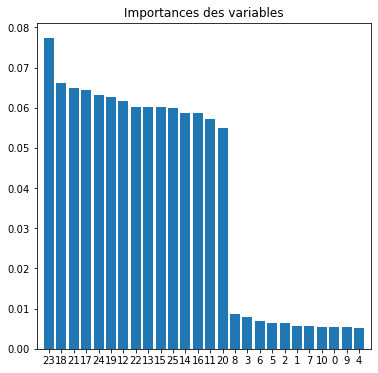

In [93]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]), indices)
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

### Régression

In [94]:
#help(RandomForestRegressor)

In [95]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Yr_train)
print(rfFit.oob_score_)

0.2755876274237551


In [96]:
prev=rfFit.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))
print("R2=",r2_score(Yr_test,prev))

MSE= 0.6286499096016124
R2= 0.30981181865958274


Optimisation par validation croisée du nombre d'arbres dans la forêts et du nombre de variables tirées aléatoirement lors de la construction de chaque noeud. 

In [97]:
param=[{"n_estimators":list(range(100,500,100)),"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.724623, Meilleur paramètre = {'max_features': 2, 'n_estimators': 100}


In [98]:
prev=rfFit.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))
print("R2=",r2_score(Yr_test,prev))

MSE= 0.6286499096016124
R2= 0.30981181865958274


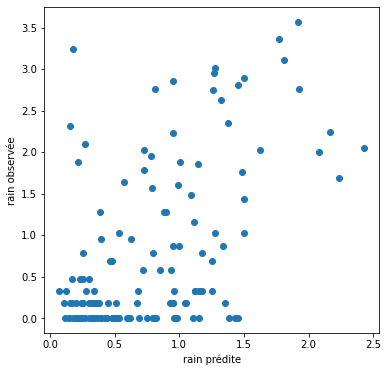

In [99]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
plt.show()

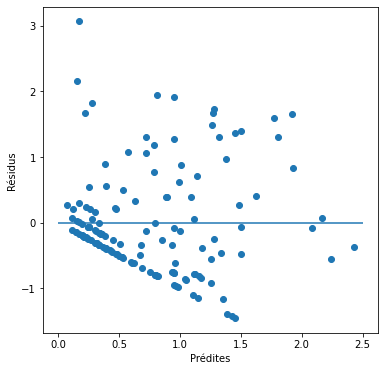

In [100]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,2.5)
plt.show()

In [101]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Yr_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

msl_arome 0.0888030356742011
Lprecip 0.08385925429405894
v10_arome 0.07060391346917941
u10_arome 0.07009500635495447
dd 0.06773429994826512
Ltp_arome 0.0671723243183242
t 0.06383560189151669
p3031_arome 0.06305025147620973
ws_arome 0.05700515963300894
t2m_arome 0.05396650089428239
ff 0.053626241235415956
td 0.05253477633355663
hu 0.05168617926523064
d2m_arome 0.049338217972457965
r_arome 0.046739431350675036
January 0.008976874223167668
February 0.00879352594778236
November 0.006969033700264085
December 0.005750853085592384
May 0.004993082720812248
June 0.0046598546364042875
March 0.0046023004496305205
September 0.004436882405987828
August 0.0040841810740398716
October 0.003947135462059452
July 0.0027360821829220767


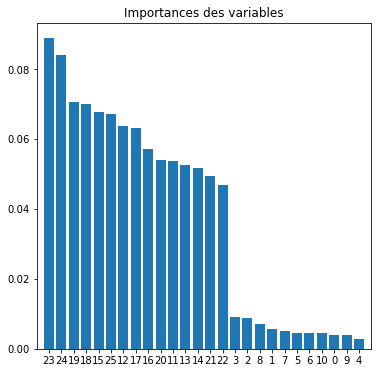

In [102]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]), indices)
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

## Réseau de neurones

### Classification

In [94]:
from sklearn.neural_network import MLPClassifier

On considère une seule couche cachée.

Optimisation du nombre de neurones sur la couche cachée et du paramètre `alpha` qui règle la régularisation (10-4 par défaut).
Le nombre max d'itérations par défaut (200) est insuffisant. Il est fixé à 5000.

In [95]:
#help(MLPClassifier)

In [96]:
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)]),"alpha":[.0001,.001,.01,.1]}]
nnet= GridSearchCV(MLPClassifier(solver='sgd',max_iter=5000),param_grid,cv=10,n_jobs=-1)
# MLPRegressor optimiseur à changer : SGD au lieu de Adam
nnetOpt=nnet.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.453145, Meilleur paramètre = {'alpha': 0.01, 'hidden_layer_sizes': (6,)}


In [97]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Xr_test,Yb_test)

0.4666666666666667

In [98]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xr_test)
# matrice de confusion
#table=pd.crosstab(y_chap,Yb_test)
#print(table)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,19,8,5
low_rain,14,45,31
no_rain,5,7,16


On teste si un gain est possible en passant à deux ou trois couches cachées.

Dans la plupart des cas, la méthode de validation croisée choisit un perceptron à une seule couche pour ce problème donc il n'est pas nécessaire d'en demander plus.

In [95]:
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,),(5,5,),(6,6,),(7,7,),(5,5,5,),(6,6,6,)]),"alpha":[.0001,.001,.01,.1]}]
nnet= GridSearchCV(MLPClassifier(solver='sgd',max_iter=5000),param_grid,cv=10,n_jobs=-1)
# MLPRegressor optimiseur à changer : SGD au lieu de Adam
nnetOpt=nnet.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.462509, Meilleur paramètre = {'alpha': 0.001, 'hidden_layer_sizes': (6,)}


In [96]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Xr_test,Yb_test)

0.44666666666666666

In [97]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xr_test)
# matrice de confusion
#table=pd.crosstab(y_chap,Yb_test)
#print(table)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,17,7,4
low_rain,17,47,29
no_rain,4,6,19


### Régression

In [21]:
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)]),"alpha":[.001,.01,.1]}]
nnet= GridSearchCV(MLPRegressor(max_iter=5000),param_grid,cv=10,n_jobs=-1)
# MLPRegressor optimiseur à changer : SGD au lieu de Adam
nnetOpt=nnet.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur R2 = 0.257129, Meilleur paramètre = {'alpha': 0.1, 'hidden_layer_sizes': (7,)}


In [22]:
prev=nnet.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))
print("R2=",r2_score(Yr_test,prev))

MSE= 0.6823140605417786
R2= 0.2508945068539661


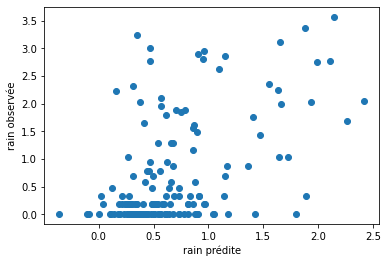

In [23]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"rain prédite")
plt.ylabel(u"rain observée")
plt.show()

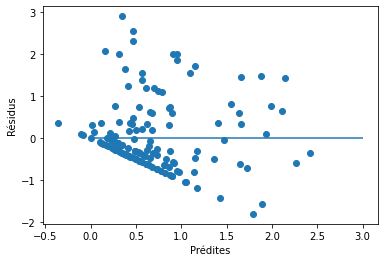

In [24]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,0,3)
plt.show()

Test : on transforme les valeurs prédites en classe.
On assigne la classe "no_rain" aux valeurs négatives.

Pour dénombrer les erreurs par matrice de confusion, on crée 2 variables à 3 classes prevclass et Yrclass_test à partir de prev et Yr_test et on applique ensuite la fonction confusion_matrix.

In [25]:
RAIN_DIC = {1 : "high_rain",
2 : "low_rain",
3 : "no_rain"}
labels = RAIN_DIC.values()

prevclass = []
for element in prev :
    if element <= 0 :
        prevclass.append("no_rain")
    elif element <= log(3) :
        prevclass.append("low_rain")
    else :
        prevclass.append("high_rain")

Yrclass_test = []
for element in Yr_test :
    if element <= 0 :
        Yrclass_test.append("no_rain")
    elif element <= log(3) :
        Yrclass_test.append("low_rain")
    else :
        Yrclass_test.append("high_rain")

from sklearn.metrics import confusion_matrix, accuracy_score
pd.DataFrame(confusion_matrix(prevclass, Yrclass_test), index = labels, columns=labels)

,high_rain,low_rain,no_rain
high_rain,14,7,3
low_rain,24,53,46
no_rain,0,0,3


## Synthèse: comparaison des méthodes

### Itération sur plusieurs échantillons de test (validation croisée *Monte Carlo*)

L'échantillon test est de taille modeste et donc l'estimation de l'erreur de prévision peut présenter une variance importante. Celle-ci est réduite en opérant une forme de validation croisée (*Monte Carlo*) en tirant plusieurs couples d'échantillons d'apprentissage et test pour itérer les traitements précédents.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [105]:
from sklearn.utils import check_random_state
import time
check_random_state(13)
tps0=time.perf_counter()
# définition des estimateurs
logit= LogisticRegression(penalty="l1",solver="liblinear")
svm  = SVC()
knn  = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf   = RandomForestClassifier(n_estimators=100)
nnet = MLPClassifier(solver='sgd',max_iter=5000)
# Nombre d'itérations
B=10 # test avec 3 échantillons tests - pour exécuter après le test, mettre plutôt B=30
# définition des grilles de paramètres
listMethGrid=[[logit,{"C":[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]}],
    [svm,{"C":[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2],"gamma":[.03,.04,.05]}],
    [knn,{"n_neighbors":list(range(1,15))}],
    [tree,{"max_depth":list(range(2,10))}],
    [rf,{"n_estimators":list(range(100,500,100)),"max_features":list(range(2,10,1))}],
    [nnet,{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)]),"alpha":[.0001,.001,.01,.1]}]
    ]
# Initialisation à 0 des erreurs pour chaque méthode (colonne) et chaque itération (ligne)
arrayErreur=np.empty((B,6))
for i in range(B):   # itérations sur B échantillons test
    # extraction apprentissage et test
    X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=150)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    Xr_train = scaler.transform(X_train)  
    # Meme transformation sur le test
    Xr_test = scaler.transform(X_test)    
    # optimisation de chaque méthode et calcul de l'erreur sur le test
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1).fit(Xr_train, Yb_train)
#                               ,iid="TRUE").fit(Xr_train, Yb_train)
        methodOpt = methodGrid.best_estimator_
        methFit=methodOpt.fit(Xr_train, Yb_train)
        arrayErreur[i,j]=1-methFit.score(Xr_test,Yb_test)
tps1=time.perf_counter()
print("Temps execution en mn :",(tps1 - tps0))
dataframeErreur=pd.DataFrame(arrayErreur,columns=["Logit","SVM","Knn","Tree","RF","NN"])    

Temps execution en mn : 2027.6815723549998


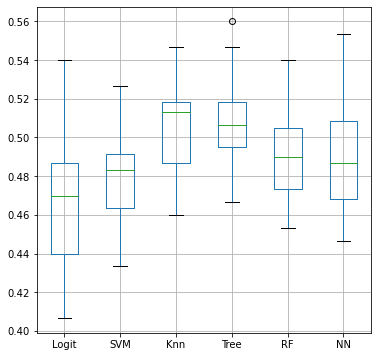

In [106]:
# Distribution des erreurs de prévisions
dataframeErreur[["Logit","SVM","Knn","Tree","RF","NN"]].boxplot(return_type='dict')
plt.show()

In [107]:
# Moyennes
dataframeErreur.mean()

Logit    0.468000
SVM      0.478667
Knn      0.504667
Tree     0.508667
RF       0.490000
NN       0.490667
dtype: float64

In [108]:
# Ecarts-types
dataframeErreur.std()

Logit    0.039603
SVM      0.026998
Knn      0.024555
Tree     0.029153
RF       0.025386
NN       0.034312
dtype: float64

In [109]:
# Medianes
dataframeErreur.median()

Logit    0.470000
SVM      0.483333
Knn      0.513333
Tree     0.506667
RF       0.490000
NN       0.486667
dtype: float64

In [110]:
# Ecart interquartile : Q3-Q1
dataframeErreur.quantile(q=0.75)-dataframeErreur.quantile(q=0.25)

Logit    0.046667
SVM      0.028333
Knn      0.031667
Tree     0.023333
RF       0.031667
NN       0.040000
dtype: float64